Giorgio Mendoza

RBE595-S24-S04

Temporal Difference Programming Excercise

#Objective:

This code implements SARSA and Q-learning algorithms in the Cliff Walking task, a grid-based environment where an agent aims to reach a goal from a start point while avoiding a "cliff" that triggers large negative rewards. The environment setup defines the grid, start and goal positions, cliff locations, and a step function to update the agent's state and reward based on its actions. SARSA, an on-policy method, and Q-learning, an off-policy method, are compared through simulation, with their learning progress visualized in a plot of cumulative rewards per episode.


#SARSA (State-Action-Reward-State-Action):
An on-policy algorithm that updates its Q-values based on the action actually taken according to the current policy, which includes exploration. This approach makes SARSA more cautious, as it learns from the actual outcomes of its actions.

#Q-learning:
An off-policy algorithm that updates its Q-values based on the maximum potential reward from the next state, independent of the agent's current exploration strategy. This can lead to more aggressive exploration and occasionally higher negative rewards due to riskier paths taken.

#Epsilon-Greedy Policy:
A common exploration strategy where, with probability ε, the agent chooses a random action, and with probability 1-ε, it chooses the best-known action. This policy is used by both algorithms to balance exploration and exploitation.

#Training Function:
The train function runs simulations of the specified algorithm over a series of episodes. It accumulates rewards received in each episode and updates the Q-values according to the algorithm's rules. The function outputs a list of total rewards per episode, which serves as a measure of the agent's learning progress.

#Plotting:
At the end, we generate a plot comparing the sum of rewards during each episode for both algorithms. This visual comparison helps in analyzing the efficiency and learning behavior of SARSA and Q-learning across episodes.


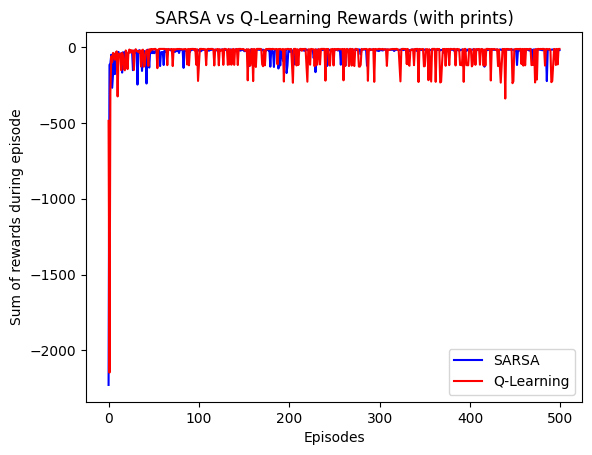

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#parameters
num_episodes = 500
epsilon = 0.1
alpha = 0.5
gamma = 1
actions = ['up', 'right', 'down', 'left']
width, height = 12, 4
start, goal = (3, 0), (3, 11)
cliff = [(3, i) for i in range(1, 11)]

#initialize Q-values
Q_sarsa = {state: {action: 0 for action in actions} for state in [(x, y) for x in range(height) for y in range(width)]}
Q_ql = {state: {action: 0 for action in actions} for state in [(x, y) for x in range(height) for y in range(width)]}

#epsilon-greedy policy
def epsilon_greedy(Q, state):
    if np.random.rand() < epsilon:
        return np.random.choice(actions)
    else:
        return max(Q[state], key=Q[state].get)

#step function for environment
def step(state, action):
    next_state = tuple(np.array(state) + np.array({'up': (-1, 0), 'right': (0, 1), 'down': (1, 0), 'left': (0, -1)}[action]))
    next_state = (max(0, min(next_state[0], height - 1)), max(0, min(next_state[1], width - 1)))
    if next_state in cliff:
        return start, -100, False
    if next_state == goal:
        return goal, -1, True
    return next_state, -1, False

def train(Q, algorithm):
    rewards = []
    for episode in range(num_episodes):
        total_reward = 0
        state = start
        if algorithm == 'sarsa':
            action = epsilon_greedy(Q, state)
        step_count = 0
        while True:
            if algorithm == 'q_learning':
                action = epsilon_greedy(Q, state)
            next_state, reward, done = step(state, action)
            total_reward += reward
            if algorithm == 'sarsa':
                next_action = epsilon_greedy(Q, next_state)
                Q[state][action] += alpha * (reward + gamma * Q[next_state][next_action] - Q[state][action])
                action = next_action
            elif algorithm == 'q_learning':
                best_next_action = max(Q[next_state], key=Q[next_state].get)
                Q[state][action] += alpha * (reward + gamma * Q[next_state][best_next_action] - Q[state][action])
            state = next_state
            step_count += 1
            if done:
                break
        rewards.append(total_reward)

        #print statement for each episode
        #print(f"Episode {episode + 1}/{num_episodes}, Steps: {step_count}, Total Reward: {total_reward}")

    return rewards

rewards_sarsa_prints = train(Q_sarsa, 'sarsa')
rewards_ql_prints = train(Q_ql, 'q_learning')

plt.plot(rewards_sarsa_prints, label='SARSA', color='blue')
plt.plot(rewards_ql_prints, label='Q-Learning', color='red')
plt.xlabel('Episodes')
plt.ylabel('Sum of rewards during episode')
plt.title('SARSA vs Q-Learning Rewards (with prints)')
plt.legend()
plt.show()

#Results:

The plot above illustrates the learning progression of two reinforcement learning algorithms, SARSA and Q-learning, applied to the Cliff Walking task. The graph shows the sum of rewards per episode over 500 episodes.

Initially, both algorithms experience large negative rewards, likely due to the agent frequently falling off the cliff. As learning progresses, SARSA demonstrates a conservative approach, reflected by a gradual increase in rewards, indicating a strategy that avoids the cliff. Q-learning, however, shows a more aggressive learning curve with occasional dips in rewards, suggesting it is finding a more optimal, albeit riskier, path that occasionally results in falling.

Over time, both algorithms improve, but Q-learning exhibits a more pronounced fluctuation in rewards due to its explorative strategy, while SARSA maintains a more consistent performance.
